<a href="https://colab.research.google.com/github/sreevmtw-sys/project_insurance_fraud.ipynb/blob/main/mini_project_insurance_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INSURANCE FRAUD DETECTION**
The Insurance industary involves the sale of insurance policies to individualsand businesses, which provide financial protections against potential losses or damages. Fraud can occur in the insurance industry in a variety of ways, including false or exaggerated claims,fake policies,and identity theft. Insurers use a variety of tools and techniques, including data analysis and machine learnind, to dectect and prevent fraudulent activity.

Importing Libraries: This cell imports the necessary libraries for data manipulation, visualization, and machine learning.

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Mounting Google Drive: This code mounts your Google Drive to access the dataset stored there.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This cell lists the files in the specified Google Drive folder.

In [ ]:
!ls /content/drive/MyDrive/ml/

archive.zip  dataset.xlsx  diabetes.csv  housing.csv  Housing.csv


This cell mounts Google Drive again and reads the dataset from an Excel file into a pandas DataFrame.

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.impute import SimpleImputer
drive.mount('/content/drive')
df = pd.read_excel('/content/drive/MyDrive/ml/dataset.xlsx') # Changed back to excel as per the user's original code


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This cell displays the first 5 rows of the DataFrame to inspect the data.

In [ ]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


This cell replaces all occurrences of '?' in the DataFrame with NaN to represent missing values.

In [ ]:
df = df.replace('?',np.nan)

This cell generates descriptive statistics for the numerical columns in the DataFrame.

In [ ]:
df.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_date,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,2002-02-08 04:40:47.999999872,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,2015-01-30 08:02:24,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
min,0.000000,19.000000,100804.000000,1990-01-08 00:00:00,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,2015-01-01 00:00:00,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,1995-09-19 00:00:00,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,2015-01-15 00:00:00,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,2002-04-01 12:00:00,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,2015-01-31 00:00:00,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2008-04-21 12:00:00,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,2015-02-15 00:00:00,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2015-02-22 00:00:00,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,2015-03-01 00:00:00,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000
std,115.113174,9.140287,257063.005276,NaN,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,NaN,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861


This cell displays information about the DataFrame, including column names, non-null counts, and data types.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

This cell calculates and displays the number of missing values in each column.

In [ ]:
df.isna().sum()

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


This cell visualizes the percentage of missing values for each column using a bar plot.

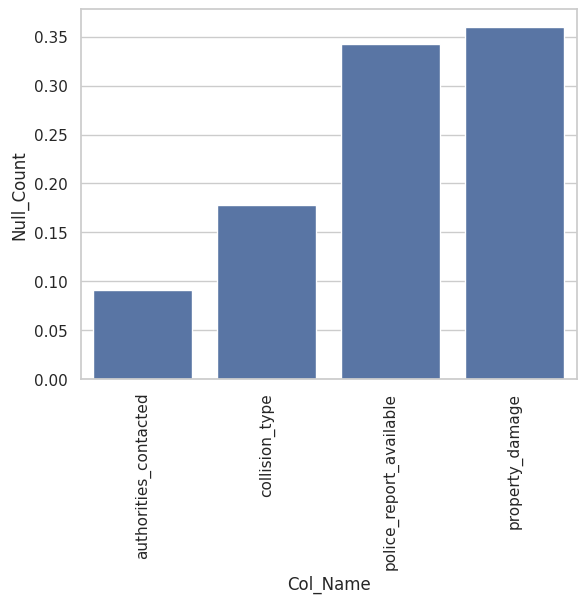

In [ ]:
missing = df.isnull().sum()/len(df) #perncentage
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing = missing.to_frame()
missing.columns = ['Null_Count']
missing.index.names = ['Col_Name']
missing = missing.reset_index()
sns.set(style='whitegrid',color_codes=True)
sns.barplot(x='Col_Name',y='Null_Count',data=missing)
plt.xticks(rotation=90)
plt.show()

This cell fills missing values in specific columns with the mode of those columns.

In [ ]:
df['collision_type']=df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage']=df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available']=df['police_report_available'].fillna(df['police_report_available'].mode()[0])

This cell calculates and visualizes the correlation matrix for numerical columns using a heatmap.

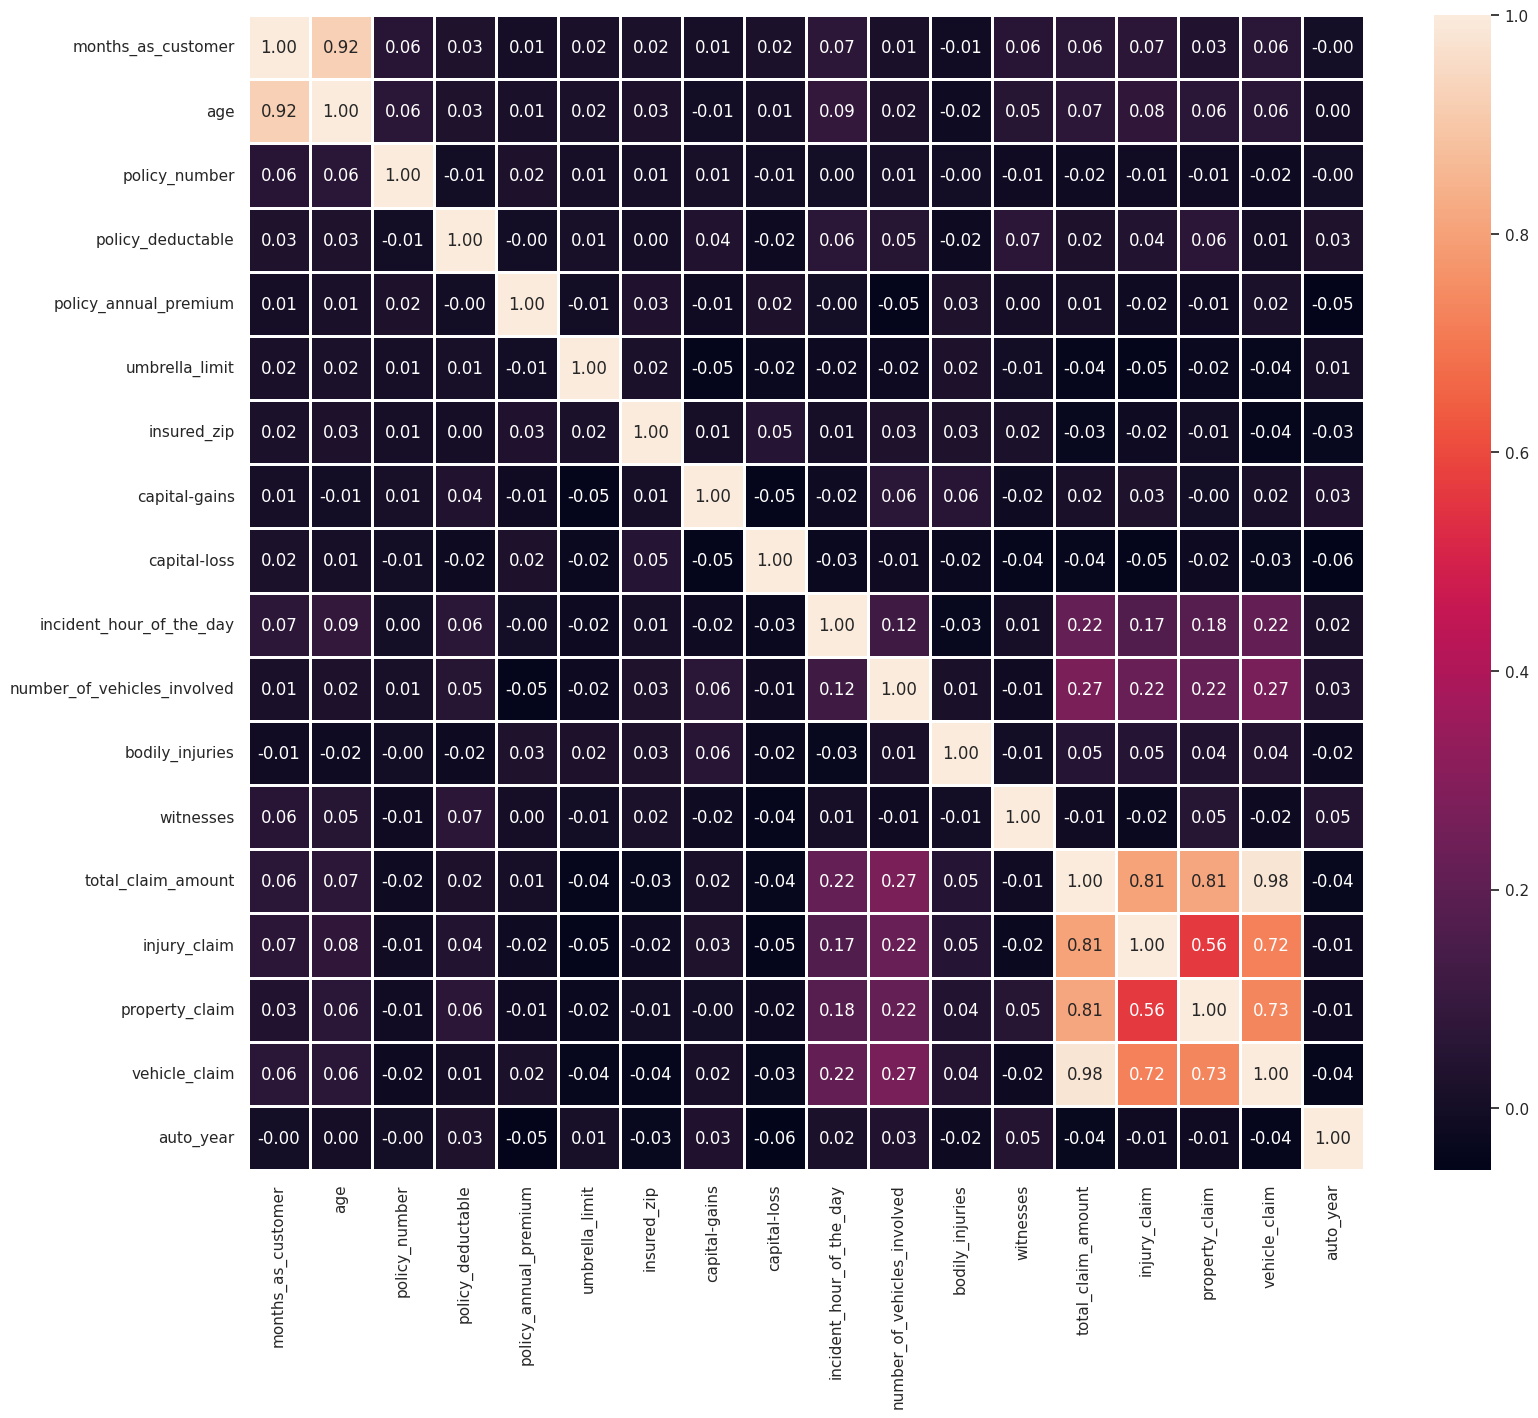

In [ ]:
plt.figure(figsize=(18,15))

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)

corr = numeric_df.corr()

sns.heatmap(data=corr, annot = True, fmt='.2f', linewidth = 2)
plt.show()

This cell counts and visualizes the number of unique values in each column.

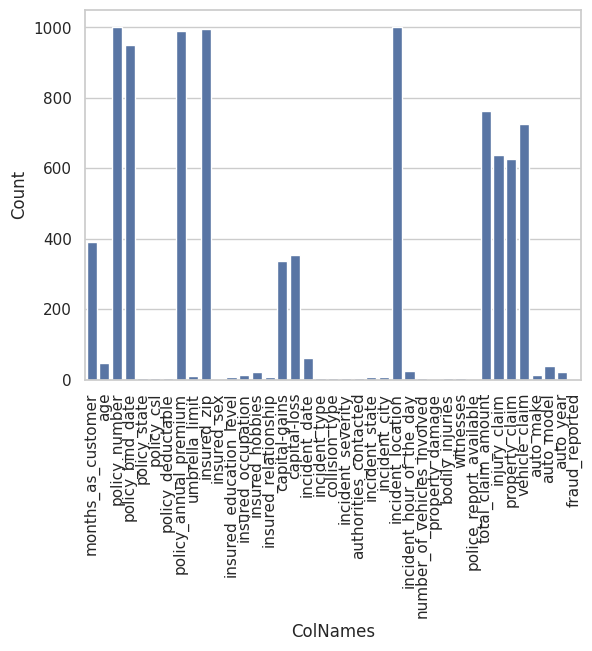

In [ ]:
unique = df.nunique().to_frame()
unique.columns = ['Count']
unique.index.names = ['ColNames']
unique = unique.reset_index()
sns.set(style='whitegrid',color_codes=True)
sns.barplot(x='ColNames',y='Count',data=unique)
plt.xticks(rotation=90)
plt.show()

This cell sorts the columns by the number of unique values in descending order.

In [ ]:
unique.sort_values(by='Count', ascending=False)

,ColNames,Count
2,policy_number,1000
24,incident_location,1000
9,insured_zip,995
7,policy_annual_premium,991
3,policy_bind_date,951
31,total_claim_amount,763
34,vehicle_claim,726
32,injury_claim,638
33,property_claim,626
0,months_as_customer,391


This cell drops several columns that are deemed not useful for the fraud detection task.

In [ ]:
# Drop Columns that are not used in our project
to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']
df.drop(to_drop, inplace=True, axis=1)

This cell displays the first few rows of the DataFrame after dropping columns.

In [ ]:
df.head()

ColNames,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


This cell shows the correlation matrix for numerical features with a mask.

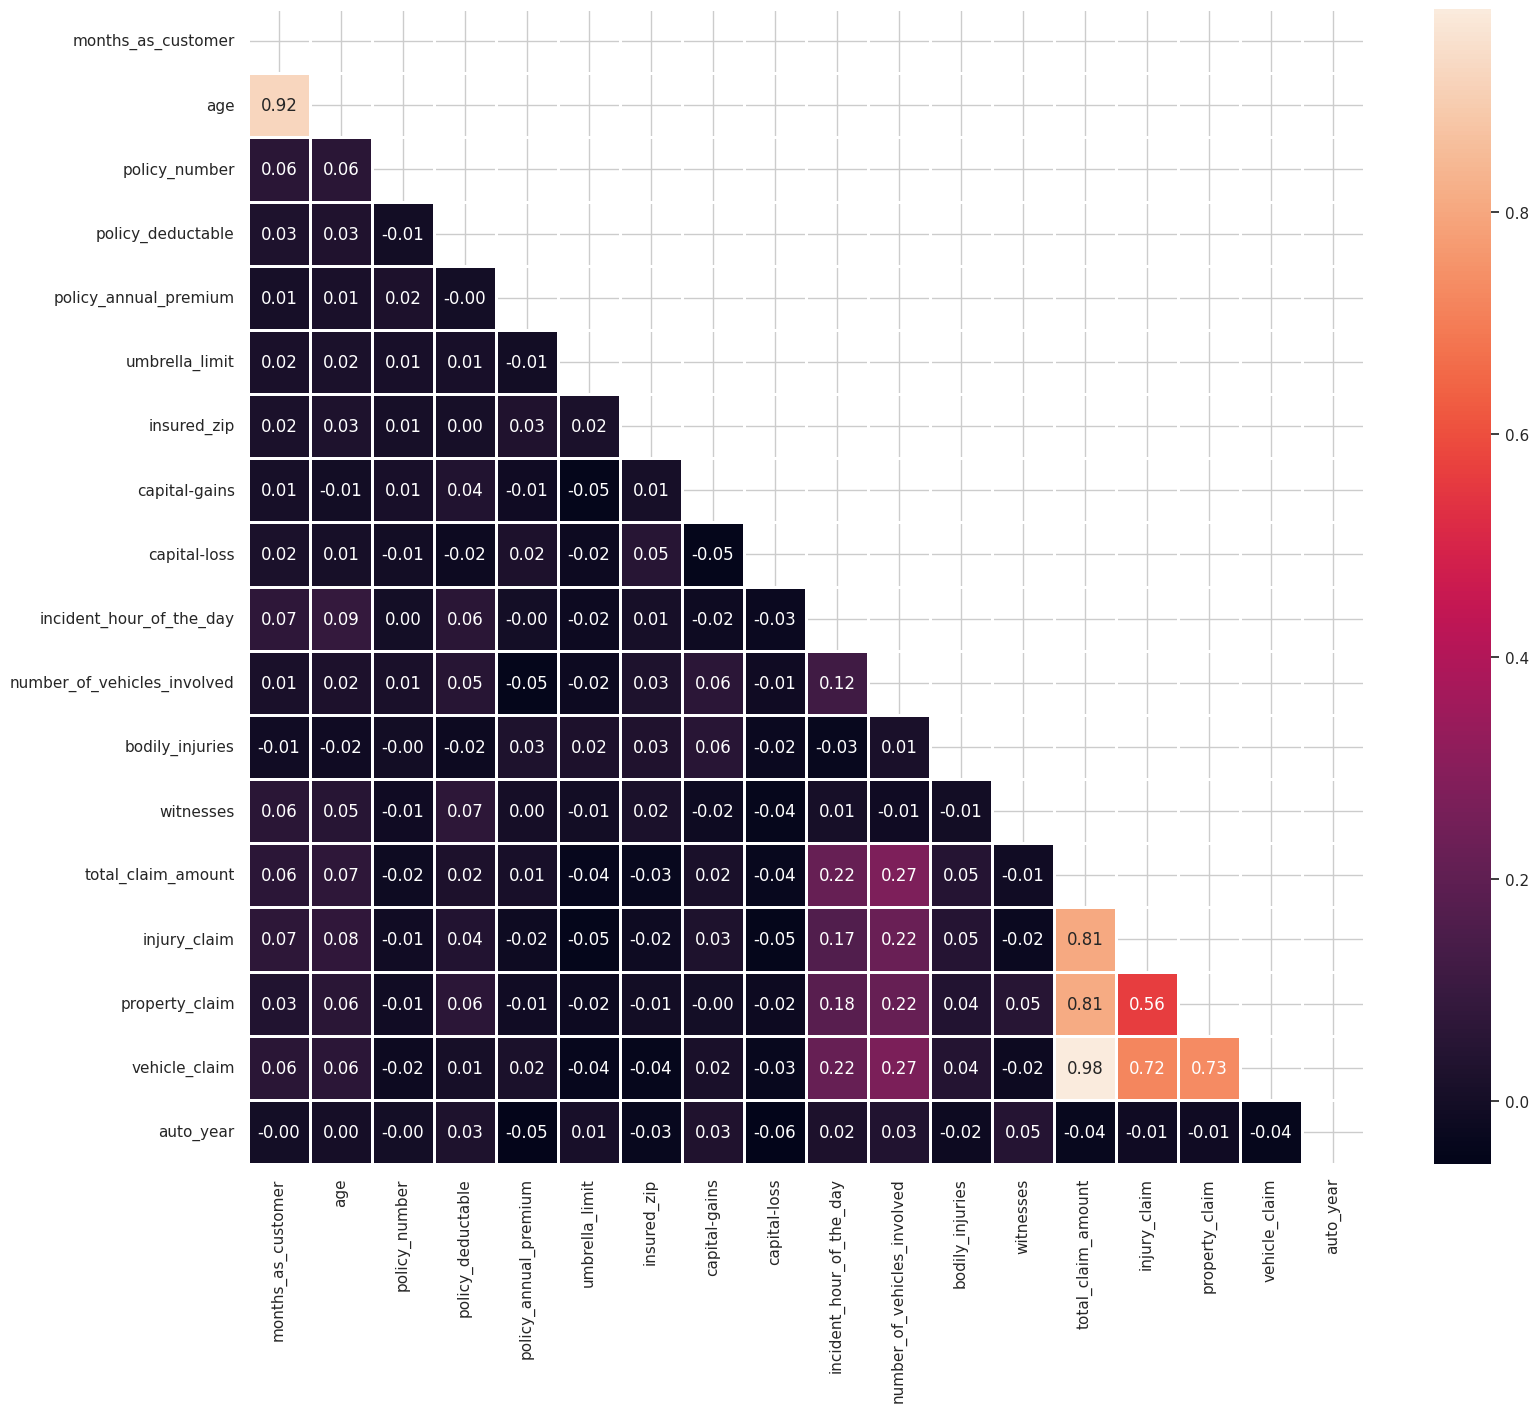

In [ ]:
plt.figure(figsize=(18,15))

corr = numeric_df.corr()
mask = np.triu(np.ones_like(corr,dtype = bool))

sns.heatmap(data=corr, mask = mask, annot = True, fmt='.2f', linewidth = 1)
plt.show()

This cell drops the 'age' and 'total_claim_amount' columns.

In [ ]:
df.drop(columns = ['age','total_claim_amount'], inplace = True, axis = 1)


This cell displays the first few rows of the DataFrame after dropping 'age' and 'total_claim_amount'.

In [ ]:
df.head()

ColNames,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,NO,0,0,NO,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,NO,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N


This cell separates the target variable (y) from the independent features (X).

In [ ]:
# Get Target and Independent Features Seperated
X = df.drop('fraud_reported',axis=1)
y = df['fraud_reported']

This cell performs one-hot encoding on the categorical features in X.

In [ ]:
# Converting Label columns into numerical by doing one-encoding
categorical_cols = X.select_dtypes(include=['object'])
categorical_cols = pd.get_dummies(categorical_cols, drop_first = True)
categorical_cols.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,True,False,True,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,True,True,True
1,True,False,True,False,False,False,True,False,False,False,...,True,False,True,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,True,False,...,True,False,True,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
4,False,True,True,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False


This cell combines numerical and one-hot encoded categorical features into a single DataFrame X.

In [ ]:
numerical_cols = X.select_dtypes(include = ['int64'])
X = pd.concat([numerical_cols,categorical_cols],axis=1)
X.head()


,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,1000,0,53300,0,5,1,1,2,6510,...,False,True,False,False,False,False,False,True,True,True
1,228,2000,5000000,0,0,8,1,0,0,780,...,False,False,True,False,False,False,False,True,False,False
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,True,False,True,False,False,False,False,True,False,False
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,False,False,False,False,False,False,False,True,False,False
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,False,False,True,False,False,False,False,False,False,False


This cell generates box plots for the numerical columns in X to visualize outliers.

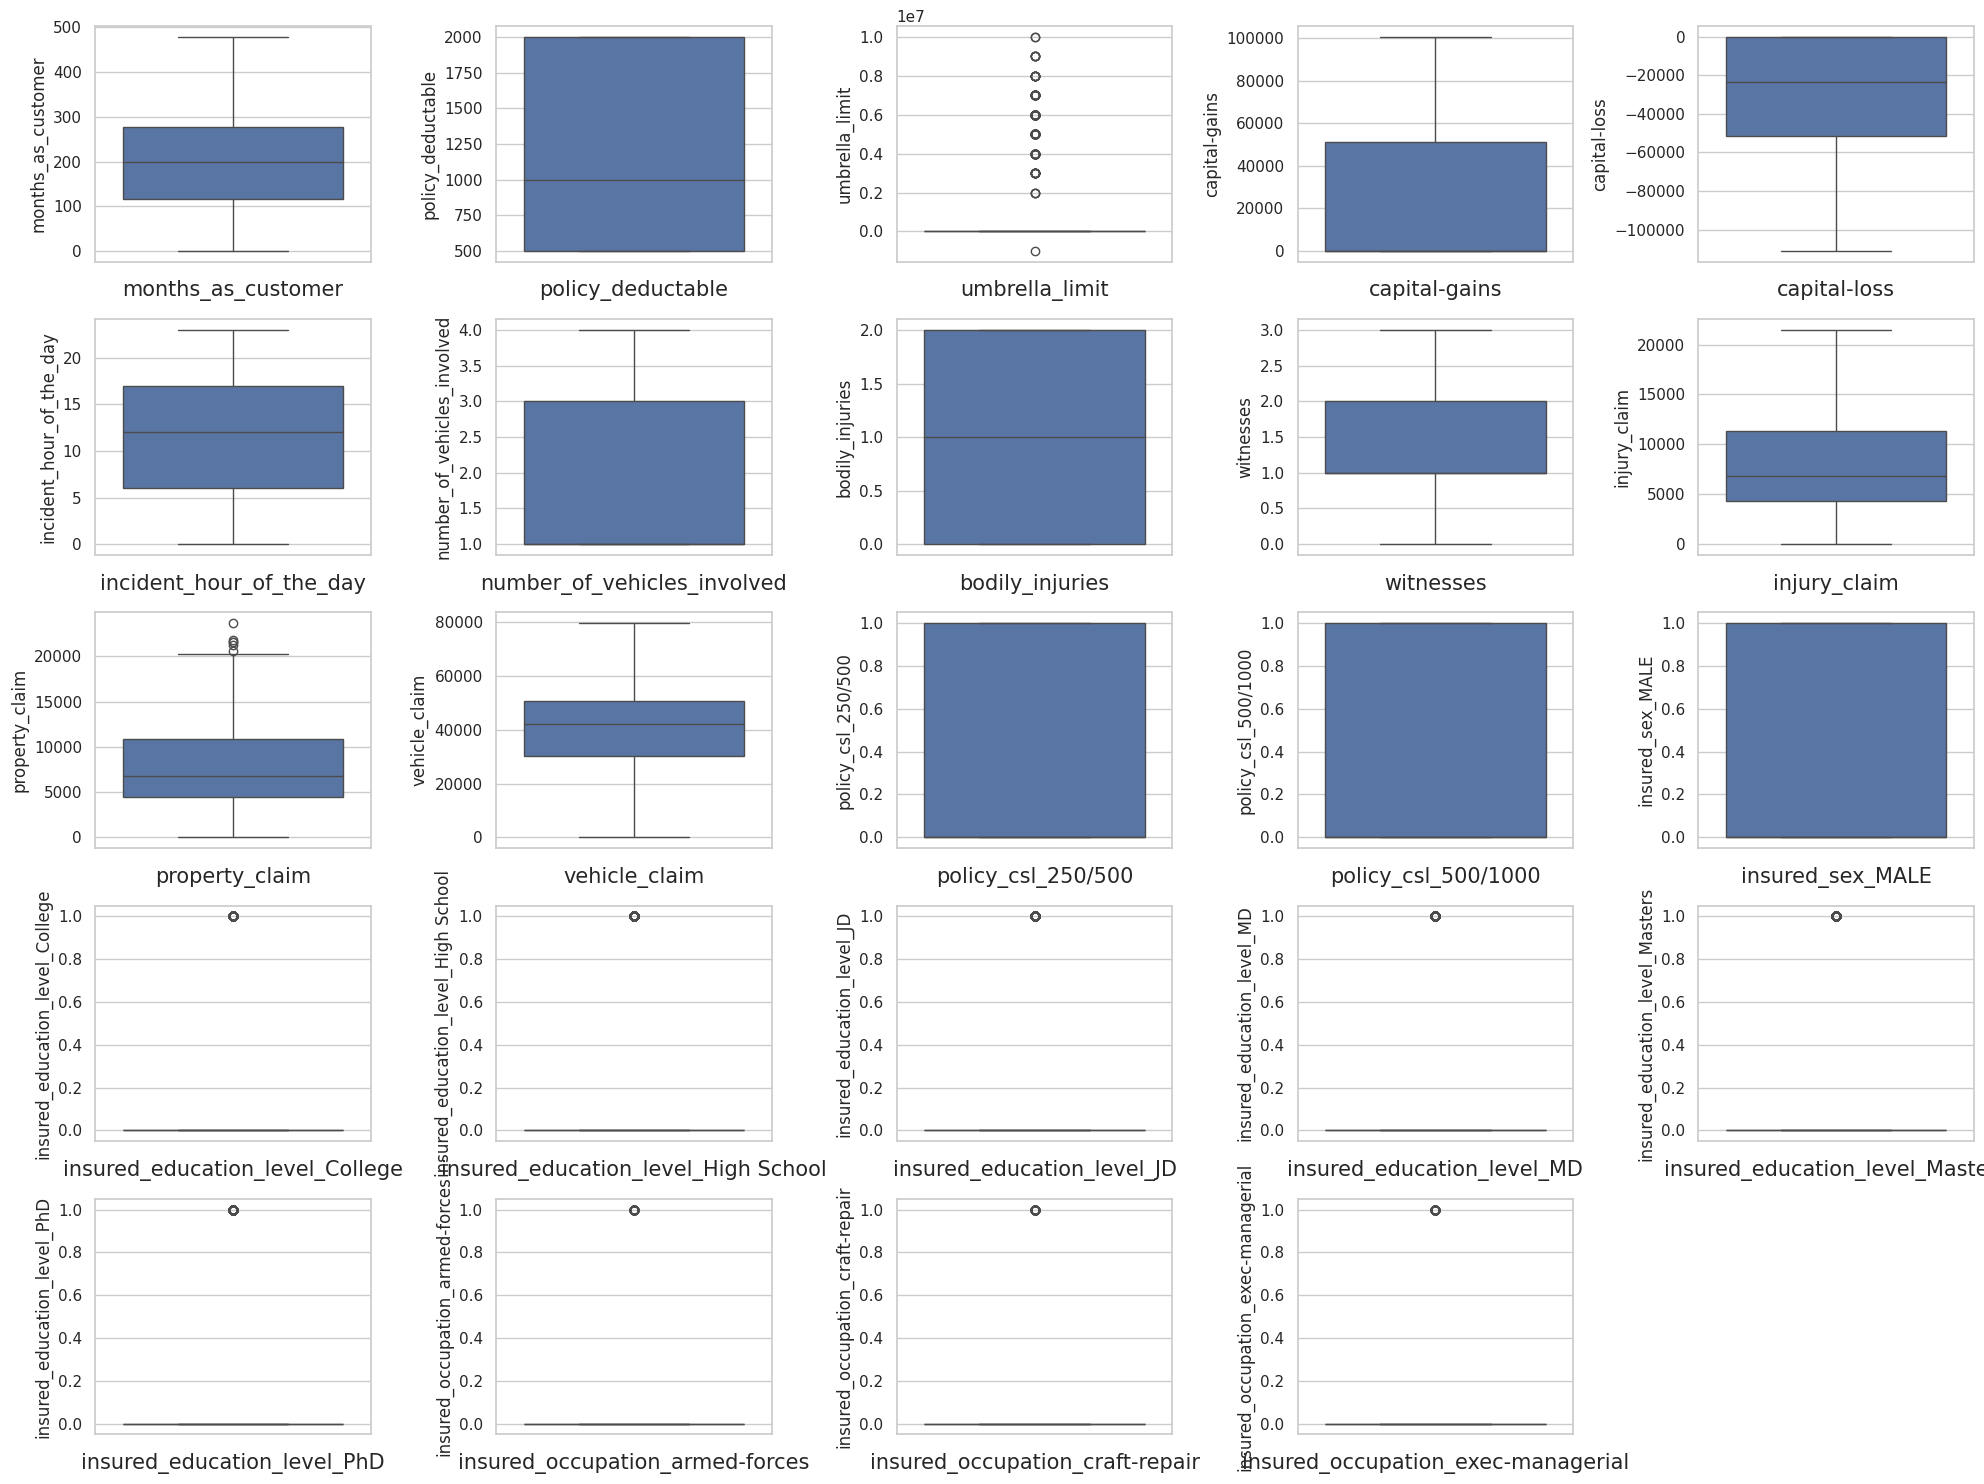

In [ ]:
# Outlier check

plt.figure(figsize=(20,15))
plotnumber = 1

for col in X.columns:
  if plotnumber<=24:
    ax = plt.subplot(5,5,plotnumber)
    sns.boxplot(X[col])
    plt.xlabel(col, fontsize = 15)

  plotnumber += 1
plt.tight_layout()
plt.show()


#*Outliers are in there,so we need to standarise those columns using standard scale*

This markdown cell notes the presence of outliers and suggests using standard scaling.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
590,193,500,0,0,0,23,3,2,1,0,...,False,True,False,True,False,False,False,False,False,True
539,230,2000,0,45400,-39400,19,1,0,2,13480,...,False,False,False,True,False,True,False,False,False,True
815,215,500,0,0,0,10,1,0,1,7070,...,True,False,False,True,False,False,False,True,False,False
282,201,2000,0,0,0,14,1,0,0,1240,...,False,False,True,False,False,False,False,True,True,True
513,184,1000,0,0,0,6,3,0,2,11940,...,False,True,True,False,False,False,False,False,False,False


This cell splits the data into training and testing sets.

This cell selects the numerical columns from the training data.

In [ ]:
numerical_df=X_train[['months_as_customer','policy_deductable','umbrella_limit','capital-gains','capital-loss',
                      'incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','injury_claim','property_claim','vehicle_claim']]

This cell applies Standard Scaler to the numerical columns of the training data.

In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
scaled_df = Scaler.fit_transform(numerical_df)

This cell converts the scaled numerical data back into a pandas DataFrame.

In [ ]:
scaled_num_df = pd.DataFrame(data = scaled_df, columns = numerical_df.columns, index = X_train.index)
scaled_num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
590,-0.074441,-1.034296,-0.465344,-0.882356,0.951028,1.638760,1.105379,1.248578,-0.443979,-1.527789,1.433927,0.634794
539,0.248837,1.410207,-0.465344,0.764336,-0.473403,1.056745,-0.840711,-1.180563,0.473333,1.261300,1.267125,0.486780
815,0.117778,-1.034296,-0.465344,-0.882356,0.951028,-0.252788,-0.840711,-1.180563,-0.443979,-0.064966,1.404737,0.608891
282,-0.004543,1.410207,-0.465344,-0.882356,0.951028,0.329226,-0.840711,-1.180563,-1.361290,-1.271226,-1.284956,-1.777822
513,-0.153077,-0.219462,-0.465344,-0.882356,0.951028,-0.834803,1.105379,-1.180563,0.473333,0.942665,-0.298735,-0.113731


This cell drops the original numerical columns from the training data.

In [ ]:
X_train.drop(columns = scaled_num_df.columns, inplace = True)


This cell concatenates the scaled numerical DataFrame with the remaining training data.

In [ ]:
X_train = pd.concat([scaled_num_df, X_train], axis = 1)


This cell displays the first few rows of the processed training data.

In [ ]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
590,-0.074441,-1.034296,-0.465344,-0.882356,0.951028,1.638760,1.105379,1.248578,-0.443979,-1.527789,...,False,True,False,True,False,False,False,False,False,True
539,0.248837,1.410207,-0.465344,0.764336,-0.473403,1.056745,-0.840711,-1.180563,0.473333,1.261300,...,False,False,False,True,False,True,False,False,False,True
815,0.117778,-1.034296,-0.465344,-0.882356,0.951028,-0.252788,-0.840711,-1.180563,-0.443979,-0.064966,...,True,False,False,True,False,False,False,True,False,False
282,-0.004543,1.410207,-0.465344,-0.882356,0.951028,0.329226,-0.840711,-1.180563,-1.361290,-1.271226,...,False,False,True,False,False,False,False,True,True,True
513,-0.153077,-0.219462,-0.465344,-0.882356,0.951028,-0.834803,1.105379,-1.180563,0.473333,0.942665,...,False,True,True,False,False,False,False,False,False,False


#**MODELING**

This markdown cell marks the beginning of the modeling section.

**SUPPORT VECTOR CLASSIFIER**

This markdown cell introduces the Support Vector Classifier model.

This cell initializes, trains, and uses an SVC model to make predictions.

This cell calculates and prints evaluation metrics for the SVC model.

In [ ]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train,y_train)

y_pred = svc_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc_model_train_acc = accuracy_score(y_train, svc_model.predict(X_train))
svc_model_test_acc = accuracy_score(y_test, y_pred)

print('Training Accuracy : ', svc_model_train_acc)
print('Testing Accuracy : ', svc_model_test_acc)
print('Confusion Matrix : \n', confusion_matrix(y_test, y_pred))
print('Classification Report : \n', classification_report(y_test, y_pred))

Training Accuracy :  0.8346666666666667
Testing Accuracy :  0.732
Confusion Matrix : 
 [[183   0]
 [ 67   0]]
Classification Report : 
               precision    recall  f1-score   support

           N       0.73      1.00      0.85       183
           Y       0.00      0.00      0.00        67

    accuracy                           0.73       250
   macro avg       0.37      0.50      0.42       250
weighted avg       0.54      0.73      0.62       250



**K-NEAREST NEIGHBOR**

This markdown cell introduces the K-Nearest Neighbor model.

This cell initializes, trains, and uses a KNN model to make predictions.

This cell calculates and prints evaluation metrics for the KNN model.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 30)
knn_model.fit(X_train,y_train)

y_pred = knn_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_model_train_acc = accuracy_score(y_train, knn_model.predict(X_train))
knn_model_test_acc = accuracy_score(y_test, y_pred)

print('Training Accuracy : ', knn_model_train_acc)
print('Testing Accuracy : ', knn_model_test_acc)
print('Confusion Matrix : \n', confusion_matrix(y_test, y_pred))
print('Classification Report : \n', classification_report(y_test, y_pred))

Training Accuracy :  0.7613333333333333
Testing Accuracy :  0.732
Confusion Matrix : 
 [[183   0]
 [ 67   0]]
Classification Report : 
               precision    recall  f1-score   support

           N       0.73      1.00      0.85       183
           Y       0.00      0.00      0.00        67

    accuracy                           0.73       250
   macro avg       0.37      0.50      0.42       250
weighted avg       0.54      0.73      0.62       250



**DECISION TREE CLASSIFIER**

This markdown cell introduces the Decision Tree Classifier.

This cell initializes, trains, and uses a Decision Tree model to make predictions.

This cell calculates and prints evaluation metrics for the initial Decision Tree model.

This cell performs GridSearchCV to find the best hyperparameters for the Decision Tree model.

This cell prints the best hyperparameters and score from GridSearchCV for the Decision Tree model.

This cell initializes a Decision Tree model with the best hyperparameters and uses it for prediction.

This cell calculates and prints evaluation metrics for the hyperparameter-tuned Decision Tree model.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

y_pred = dt_model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dt_model_train_acc = accuracy_score(y_train, dt_model.predict(X_train))
dt_model_test_acc = accuracy_score(y_test, y_pred)

print('Training Accuracy : ', dt_model_train_acc)
print('Testing Accuracy : ', dt_model_test_acc)
print('Confusion Matrix : \n', confusion_matrix(y_test, y_pred))
print('Classification Report : \n', classification_report(y_test, y_pred))

Training Accuracy :  1.0
Testing Accuracy :  0.488
Confusion Matrix : 
 [[ 82 101]
 [ 27  40]]
Classification Report : 
               precision    recall  f1-score   support

           N       0.75      0.45      0.56       183
           Y       0.28      0.60      0.38        67

    accuracy                           0.49       250
   macro avg       0.52      0.52      0.47       250
weighted avg       0.63      0.49      0.51       250



In [ ]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3,5,7,10],
    'min_samples_split' : range(2,10,1),
    'min_samples_leaf' : range(2,10,1)
}

grid_search = GridSearchCV(estimator = dt_model, param_grid = grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 7, 'min_samples_split': 2}
0.8


In [ ]:
dt_model = grid_search.best_estimator_
y_pred = dt_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dt_model_train_acc = accuracy_score(y_train, dt_model.predict(X_train))
dt_model_test_acc = accuracy_score(y_test, y_pred)

print('Training Accuracy of dt : ', dt_model_train_acc)
print('Testing Accuracy of dt : ', dt_model_test_acc)
print('Confusion Matrix : \n', confusion_matrix(y_test, y_pred))
print('Classification Report : \n', classification_report(y_test, y_pred))

Training Accuracy of dt :  1.0
Testing Accuracy of dt :  0.488
Confusion Matrix : 
 [[ 82 101]
 [ 27  40]]
Classification Report : 
               precision    recall  f1-score   support

           N       0.75      0.45      0.56       183
           Y       0.28      0.60      0.38        67

    accuracy                           0.49       250
   macro avg       0.52      0.52      0.47       250
weighted avg       0.63      0.49      0.51       250



**RANDOM FOREST CLASSIFIER**

This markdown cell introduces the Random Forest Classifier.

This cell initializes, trains, and uses a Random Forest model to make predictions.

This cell calculates and prints evaluation metrics for the Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(criterion='entropy',max_depth=15,max_features='sqrt',min_samples_leaf=1,min_samples_split=3,n_estimators=14)
rf_model.fit(X_train,y_train)

y_pred = rf_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_model_train_acc = accuracy_score(y_train, rf_model.predict(X_train))
rf_model_test_acc = accuracy_score(y_test, y_pred)

print('Training Accuracy : ', rf_model_train_acc)
print('Testing Accuracy : ', rf_model_test_acc)
print('Confusion Matrix : \n', confusion_matrix(y_test, y_pred))
print('Classification Report : \n', classification_report(y_test, y_pred))

Training Accuracy :  0.9746666666666667
Testing Accuracy :  0.736
Confusion Matrix : 
 [[150  33]
 [ 33  34]]
Classification Report : 
               precision    recall  f1-score   support

           N       0.82      0.82      0.82       183
           Y       0.51      0.51      0.51        67

    accuracy                           0.74       250
   macro avg       0.66      0.66      0.66       250
weighted avg       0.74      0.74      0.74       250



**ADA BOOST CLASSIFIER**

This markdown cell introduces the AdaBoost Classifier.

This cell performs GridSearchCV to find the best hyperparameters for the AdaBoost model.

This cell prints the best hyperparameters and score from GridSearchCV for the AdaBoost model.

This cell initializes an AdaBoost model with the best hyperparameters and uses it for prediction.

This cell calculates and prints evaluation metrics for the hyperparameter-tuned AdaBoost model.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(estimator=dt_model)

parameters = {
    'n_estimators' : [50,70,90,120,180,200],
    'learning_rate' : [0.001,0.01,0.1,1,10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(estimator = ada_model, param_grid = parameters, cv = 5, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier()),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 90}
0.7173333333333333


In [ ]:
ada_model = grid_search.best_estimator_
y_pred = ada_model.predict(X_test)

In [ ]:
ada_train_acc = accuracy_score(y_train, ada_model.predict(X_train))
ada_test_acc = accuracy_score(y_test, y_pred)

print('Training Accuracy : ', ada_train_acc)
print('Testing Accuracy : ', ada_test_acc)
print('Confusion Matrix : \n', confusion_matrix(y_test, y_pred))
print('Classification Report : \n', classification_report(y_test, y_pred))

Training Accuracy :  1.0
Testing Accuracy :  0.392
Confusion Matrix : 
 [[ 60 123]
 [ 29  38]]
Classification Report : 
               precision    recall  f1-score   support

           N       0.67      0.33      0.44       183
           Y       0.24      0.57      0.33        67

    accuracy                           0.39       250
   macro avg       0.46      0.45      0.39       250
weighted avg       0.56      0.39      0.41       250



**EXTRA TREE CLASSIFIER**

This markdown cell introduces the Extra Trees Classifier.

This cell initializes, trains, and uses an Extra Trees model to make predictions and prints evaluation metrics.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

et_model = ExtraTreesClassifier()
et_model.fit(X_train,y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

et_model_acc = accuracy_score(y_test, et_model.predict(X_test))

print(f"Training accuracy {accuracy_score(y_train, et_model.predict(X_train))}")
print(f"Testing accuracy {et_model_acc}")

print('Confusion Matrix : \n', confusion_matrix(y_test, et_model.predict(X_test)))
print('Classification Report : \n', classification_report(y_test, et_model.predict(X_test)))

Training accuracy 1.0
Testing accuracy 0.784
Confusion Matrix : 
 [[166  17]
 [ 37  30]]
Classification Report : 
               precision    recall  f1-score   support

           N       0.82      0.91      0.86       183
           Y       0.64      0.45      0.53        67

    accuracy                           0.78       250
   macro avg       0.73      0.68      0.69       250
weighted avg       0.77      0.78      0.77       250



**VOTING CLASSIFIER**

This markdown cell introduces the Voting Classifier.

This cell creates a Voting Classifier using multiple models, trains it, and uses it for prediction.

In [ ]:
from sklearn.ensemble import VotingClassifier

classifiers = [('SVC', svc_model), ('KNN', knn_model), ('DT', dt_model), ('RF', rf_model), ('ADA', ada_model), ('ET', et_model)]

voting_model = VotingClassifier(estimators = classifiers)
voting_model.fit(X_train, y_train)

y_pred = voting_model.predict(X_test)

This cell calculates and prints evaluation metrics for the Voting Classifier.

In [ ]:
# accuracy score, confusion matrix and classification report

voting_model_train_acc = accuracy_score(y_train, voting_model.predict(X_train))
voting_model_test_acc = accuracy_score(y_test, y_pred)

print('Training Accuracy : ', voting_model_train_acc)
print('Testing Accuracy : ', voting_model_test_acc)

print('Confusion Matrix : \n', confusion_matrix(y_test, y_pred))
print('Classification Report : \n', classification_report(y_test, y_pred))

Training Accuracy :  0.9906666666666667
Testing Accuracy :  0.764
Confusion Matrix : 
 [[180   3]
 [ 56  11]]
Classification Report : 
               precision    recall  f1-score   support

           N       0.76      0.98      0.86       183
           Y       0.79      0.16      0.27        67

    accuracy                           0.76       250
   macro avg       0.77      0.57      0.57       250
weighted avg       0.77      0.76      0.70       250



**MODELS COMPARISION**

This cell creates a DataFrame to compare model test accuracy scores, sorted by score.

In [ ]:
models = pd.DataFrame({
    'Model' : ['SVC', 'KNN', 'DT', 'RF', 'ADA','ETC','VC'],
    'Score' : [svc_model_test_acc, knn_model_test_acc, dt_model_test_acc, rf_model_test_acc, ada_test_acc,et_model_acc,voting_model_test_acc]
})

models.sort_values(by = 'Score', ascending = False)


,Model,Score
5,ETC,0.784
6,VC,0.764
3,RF,0.736
0,SVC,0.732
1,KNN,0.732
2,DT,0.488
4,ADA,0.392


This cell generates a bar plot visualizing the test accuracy scores of different models.

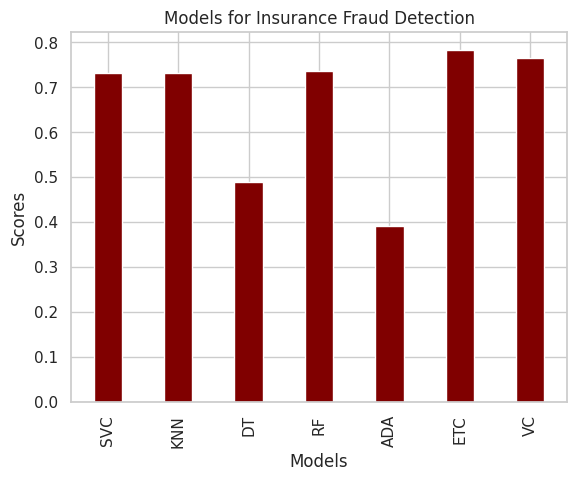

In [ ]:
plt.bar(models['Model'], models['Score'],width=0.4,color='maroon')
plt.xlabel('Models')
plt.xticks(rotation=90)
plt.ylabel('Scores')
plt.title('Models for Insurance Fraud Detection')
plt.show()